In [7]:
from skimage.io import imread
import numpy as np
from glob import glob
from multiprocessing import Pool
from functools import partial

In [8]:
fnames = sorted(glob('/groups/ahrens/ahrenslab/davis/tmp/20170228_4_1_gfaprgeco_hucgc_6dpf_shorttrials_20170228_185002/projections/dff/*.tif'))

In [9]:
sample = imread(fnames[0])

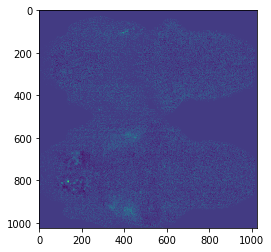

In [11]:
import matplotlib.pyplot as plt
plt.imshow(sample[17])

In [15]:
%%time
z = 17
roi = (slice(0, None),slice(600, 800))
def roi_read(fname):
    return imread(fname)[z][roi]
with Pool(5) as p:
    data = np.array(p.map(roi_read, fnames))

CPU times: user 2.62 s, sys: 9.12 s, total: 11.7 s
Wall time: 11min 28s


In [16]:
from skimage.io import imsave
imsave('/groups/ahrens/ahrenslab/davis/tmp/waist_2color.tif',data)

/groups/ahrens/home/bennettd/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /groups/ahrens/ahrenslab/davis/tmp/waist_2color.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


In [ ]:
pq.image(data)

In [2]:
import pyqtgraph as pq
%gui qt

In [3]:
from skimage.io import imread
data = imread('/groups/ahrens/ahrenslab/davis/tmp/waist_2color.tif')

In [52]:
from scipy.signal import savgol_filter

In [58]:
%%time
flt = savgol_filter(data, window_length=11, polyorder=4, axis=0)

CPU times: user 1min 9s, sys: 9.05 s, total: 1min 18s
Wall time: 1min 12s


In [79]:
pq.image(flt)

In [59]:
pktime = np.argmax(flt, axis=0)